In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
# 데이터 로드
data = pd.read_csv('성별_전체_추계인구_유소년노년.csv', encoding='euc-kr')

In [3]:
# 데이터 전처리
data = data.set_index(['성별', '연령별']).T
data.index = pd.to_numeric(data.index, errors='coerce')
data = data.dropna().sort_index()

In [4]:
# 유소년, 생산연령, 노년 인구 데이터를 추출
youth_population = data.loc[:, ('전체', '유소년')].reset_index()
working_population = data.loc[:, ('전체', '생산연령')].reset_index()
elderly_population = data.loc[:, ('전체', '노년')].reset_index()

In [5]:
# Prophet 형식에 맞게 변환
youth_population.columns = ['ds', 'y']
working_population.columns = ['ds', 'y']
elderly_population.columns = ['ds', 'y']

In [6]:
# ds 열을 datetime 형식으로 변환
youth_population['ds'] = pd.to_datetime(youth_population['ds'], format='%Y')
working_population['ds'] = pd.to_datetime(working_population['ds'], format='%Y')
elderly_population['ds'] = pd.to_datetime(elderly_population['ds'], format='%Y')


In [7]:
# Prophet 모델 생성 및 학습
def fit_prophet(df):
    model = Prophet()
    model.fit(df)
    future = model.make_future_dataframe(periods=49, freq='Y')
    forecast = model.predict(future)
    return model, forecast

youth_model, youth_forecast = fit_prophet(youth_population)
working_model, working_forecast = fit_prophet(working_population)
elderly_model, elderly_forecast = fit_prophet(elderly_population)

17:09:45 - cmdstanpy - INFO - Chain [1] start processing
17:09:45 - cmdstanpy - INFO - Chain [1] done processing
17:09:45 - cmdstanpy - INFO - Chain [1] start processing
17:09:46 - cmdstanpy - INFO - Chain [1] done processing
17:09:46 - cmdstanpy - INFO - Chain [1] start processing
17:09:46 - cmdstanpy - INFO - Chain [1] done processing


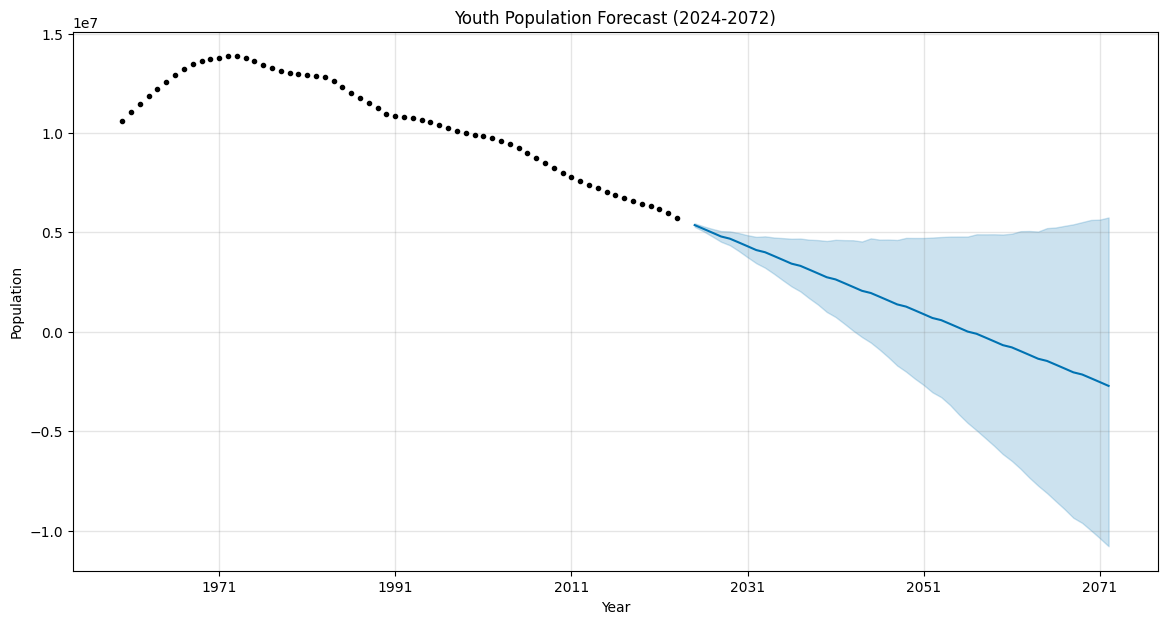

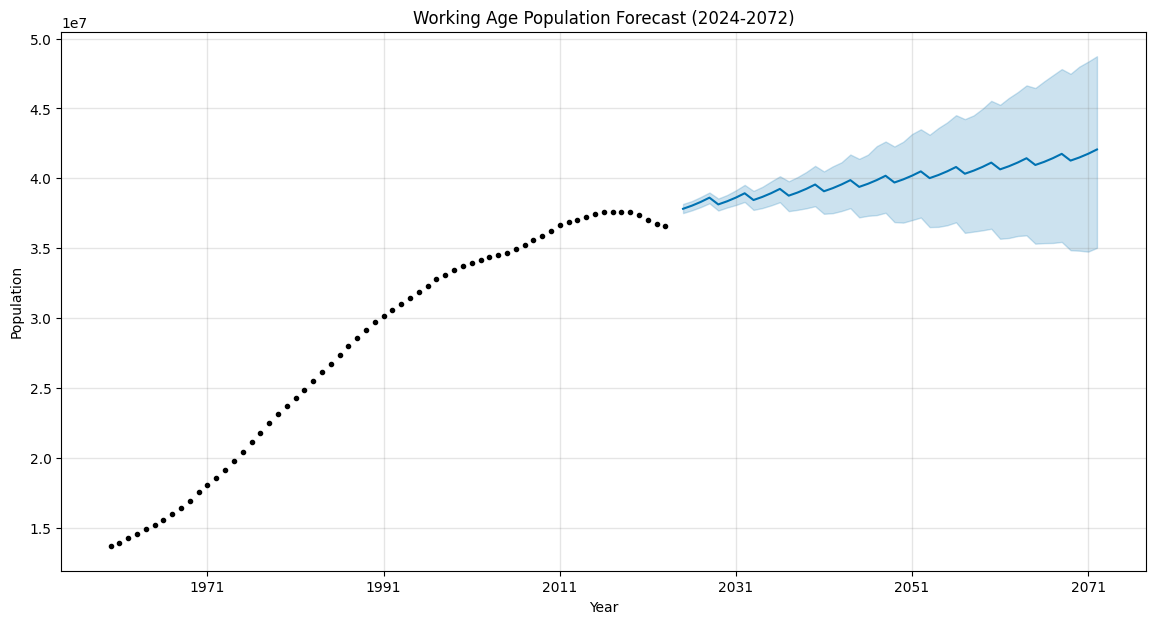

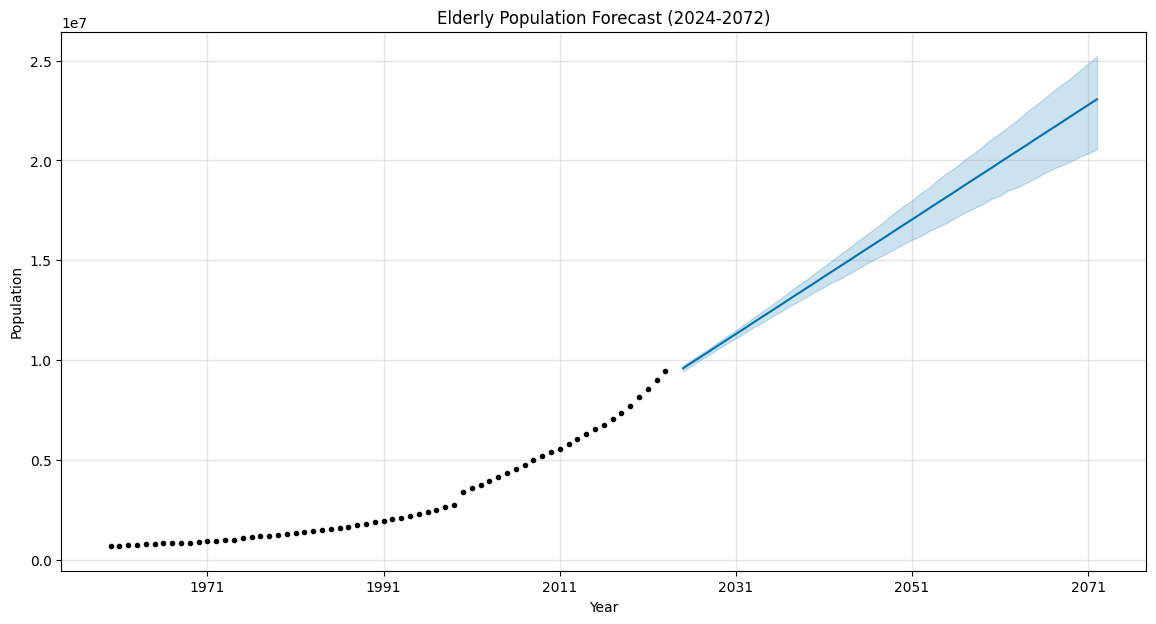

In [8]:
# 예측 결과 시각화 (2024-2072년만)
def plot_forecast(model, forecast, title):
    forecast['ds'] = pd.to_datetime(forecast['ds'])
    forecast_filtered = forecast[forecast['ds'].dt.year >= 2024]
    fig, ax = plt.subplots(figsize=(14, 7))
    model.plot(forecast_filtered, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel('Population')
    plt.show()

# 데이터 시각화
plot_forecast(youth_model, youth_forecast, 'Youth Population Forecast (2024-2072)')
plot_forecast(working_model, working_forecast, 'Working Age Population Forecast (2024-2072)')
plot_forecast(elderly_model, elderly_forecast, 'Elderly Population Forecast (2024-2072)')

In [9]:
#평균데이터 
# 예측 결과 필터링 (2024-2072년만)
youth_forecast_filtered = youth_forecast[youth_forecast['ds'].dt.year >= 2024]
working_forecast_filtered = working_forecast[working_forecast['ds'].dt.year >= 2024]
elderly_forecast_filtered = elderly_forecast[elderly_forecast['ds'].dt.year >= 2024]

# 필요한 열만 선택하여 저장
youth_forecast_filtered = youth_forecast_filtered[['ds', 'yhat']]
working_forecast_filtered = working_forecast_filtered[['ds', 'yhat']]
elderly_forecast_filtered = elderly_forecast_filtered[['ds', 'yhat']]

# 열 이름 변경
youth_forecast_filtered.columns = ['Year', '유소년']
working_forecast_filtered.columns = ['Year', '생산연령']
elderly_forecast_filtered.columns = ['Year', '노년']

# 예측 결과 결합
combined_forecast = pd.merge(youth_forecast_filtered, working_forecast_filtered, on='Year')
combined_forecast = pd.merge(combined_forecast, elderly_forecast_filtered, on='Year')

# CSV 파일로 저장
combined_forecast.to_csv('Prophet겱과.csv', index=False, encoding='euc-kr')

In [ ]:
#low 평균데이터 

In [10]:
# 예측 결과 필터링 (2024-2072년만)
youth_forecast_filtered = youth_forecast[youth_forecast['ds'].dt.year >= 2024]
working_forecast_filtered = working_forecast[working_forecast['ds'].dt.year >= 2024]
elderly_forecast_filtered = elderly_forecast[elderly_forecast['ds'].dt.year >= 2024]

# 필요한 열만 선택하여 저장 (lower bound 데이터만 포함)
youth_forecast_lower = youth_forecast_filtered[['ds', 'yhat_lower']]
working_forecast_lower = working_forecast_filtered[['ds', 'yhat_lower']]
elderly_forecast_lower = elderly_forecast_filtered[['ds', 'yhat_lower']]

# 열 이름 변경
youth_forecast_lower.columns = ['Year', '유소년']
working_forecast_lower.columns = ['Year', '생산연령']
elderly_forecast_lower.columns = ['Year', '노년']

# 예측 결과 결합
combined_forecast_lower = pd.merge(youth_forecast_lower, working_forecast_lower, on='Year')
combined_forecast_lower = pd.merge(combined_forecast_lower, elderly_forecast_lower, on='Year')

# CSV 파일로 저장
combined_forecast_lower.to_csv('Prophet_low결과.csv', index=False, encoding='euc-kr')

